In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [6]:
df = pd.read_csv("Student Performance Prediction-Multi.csv")

In [7]:
df 

,Student ID,Quiz01 [10],Assignment01 [8],Midterm Exam [20],Assignment02 [12],Assignment03 [25],Final Exam [35],Course Grade,Total [100],Class
0,student000000,95,91,70,90,84,64,85,85,G
1,student000001,85,76,65,61,73,64,76,76,G
2,student000002,85,41,73,61,73,61,73,73,G
3,student000003,80,78,80,79,79,57,80,79,G
4,student000004,85,91,78,80,84,67,85,85,G
...,...,...,...,...,...,...,...,...,...,...
481,student000481,90,85,93,87,81,77,92,92,G
482,student000482,80,68,93,70,83,83,90,90,G
483,student000483,80,86,93,95,90,83,96,96,G
484,student000484,75,68,80,76,88,50,78,78,G


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Student ID         486 non-null    object
 1   Quiz01 [10]        486 non-null    int64 
 2   Assignment01 [8]   486 non-null    int64 
 3   Midterm Exam [20]  486 non-null    int64 
 4   Assignment02 [12]  486 non-null    int64 
 5   Assignment03 [25]  486 non-null    int64 
 6   Final Exam [35]    486 non-null    int64 
 7   Course Grade       486 non-null    int64 
 8   Total [100]        486 non-null    int64 
 9   Class              486 non-null    object
dtypes: int64(8), object(2)
memory usage: 38.1+ KB


In [10]:
df.isna().sum()

Student ID           0
Quiz01 [10]          0
Assignment01 [8]     0
Midterm Exam [20]    0
Assignment02 [12]    0
Assignment03 [25]    0
Final Exam [35]      0
Course Grade         0
Total [100]          0
Class                0
dtype: int64

 no null values 

In [15]:
df['Class_encoded'] = df['Class'].astype('category').cat.codes

# Calculate correlation
class_grade_corr = df['Course Grade'].corr(df['Class_encoded'])
print(f"Correlation between Course Grade and Class: {class_grade_corr:.2f}")

Correlation between Course Grade and Class: 0.31


## A correlation of 0.31 between Course Grade and Class indicates a weak positive correlation. Here’s how to interpret this result:

1. Interpretation of the Correlation Value
A correlation coefficient close to 1 or -1 indicates a strong relationship, while a value close to 0 suggests little to no linear relationship.
With a correlation of 0.31, there’s a weak, positive association between Course Grade and Class, meaning that as one of these values increases, the other might increase slightly, but not in a strongly predictive way.
2. Possible Inferences
Weak Predictive Relationship: Class may have some influence on Course Grade, but it’s not a strong predictor on its own.
Other Factors at Play: The weak correlation suggests that other factors, like individual assessments (e.g., Final Exam, Assignments), likely contribute more to the variation in Course Grade.
Class Influence: If the Class categories represent groupings based on performance or skill level, this weak correlation might imply only a minimal distinction in performance based on Class.
3. Recommendations for Further Analysis
Check for Additional Correlations: Examining correlations between Course Grade and individual assessments could reveal stronger relationships.
Feature Engineering: Consider creating new features (e.g., average assignment score or final exam weight) that may have a higher correlation with Course Grade.
Multi-factor Model: To predict Course Grade more accurately, consider using all features (such as assignment scores and exams) in a regression or classification model, as they may collectively provide better insights.
This weak positive correlation suggests that while Class may slightly relate to performance, it likely plays a minor role compared to other factors in predicting Course Grade.

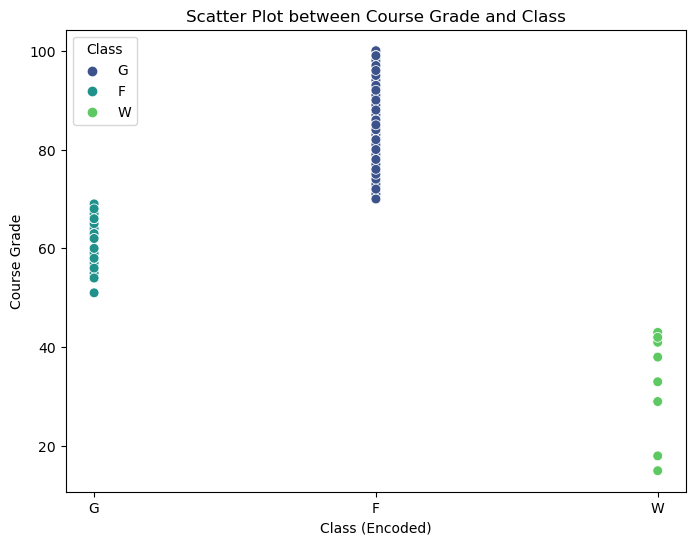

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Class_encoded', y='Course Grade', data=df, hue='Class', palette='viridis', s=50)
plt.xlabel("Class (Encoded)")
plt.ylabel("Course Grade")
plt.title("Scatter Plot between Course Grade and Class")
plt.xticks(ticks=range(len(df['Class'].unique())), labels=df['Class'].unique())
plt.legend(title='Class', loc='upper left')
plt.show()

In [20]:
class_grade_corr = df['Quiz01 [10]'].corr(df['Class_encoded'])
print(f"Correlation between Quiz 1 and Class: {class_grade_corr:.2f}")

Correlation between Quiz 1 and Class: -0.02


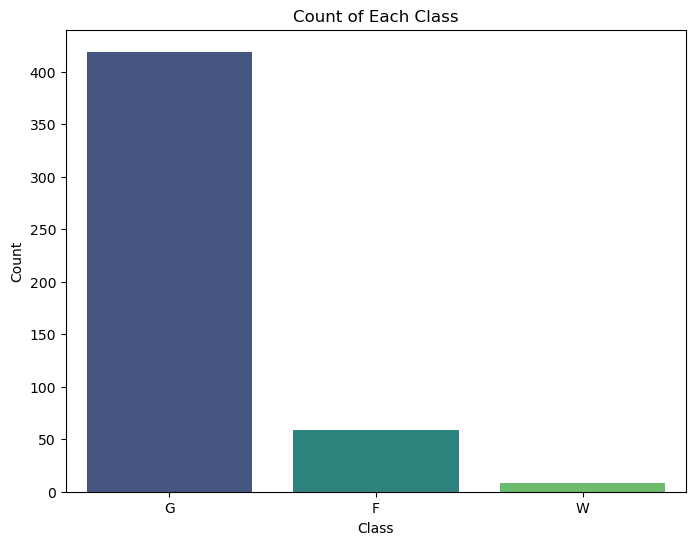

In [22]:
class_counts = df['Class'].value_counts()

# Bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Count of Each Class")
plt.show()

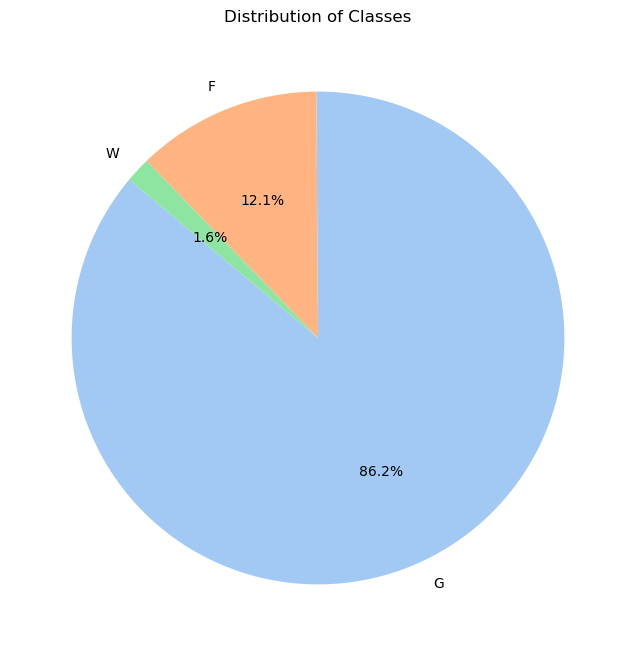

In [24]:
# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel", len(class_counts)))
plt.title("Distribution of Classes")
plt.show()


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


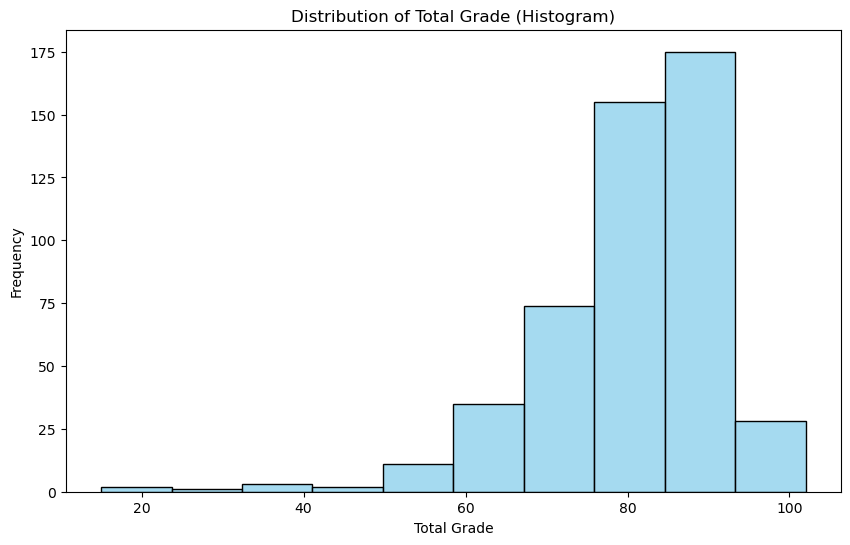

In [29]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Total [100]'], bins=10, kde=False, color="skyblue")
plt.xlabel("Total Grade")
plt.ylabel("Frequency")
plt.title("Distribution of Total Grade (Histogram)")
plt.show()



C:\Users\hp\AppData\Local\Temp\ipykernel_16808\3380098501.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Total [100]'], shade=True, color="salmon")
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


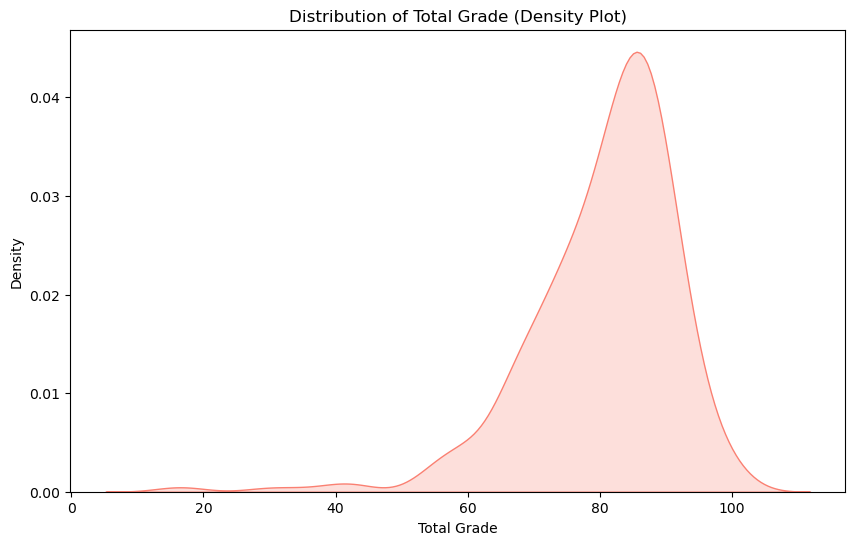

In [30]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Total [100]'], shade=True, color="salmon")
plt.xlabel("Total Grade")
plt.ylabel("Density")
plt.title("Distribution of Total Grade (Density Plot)")
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

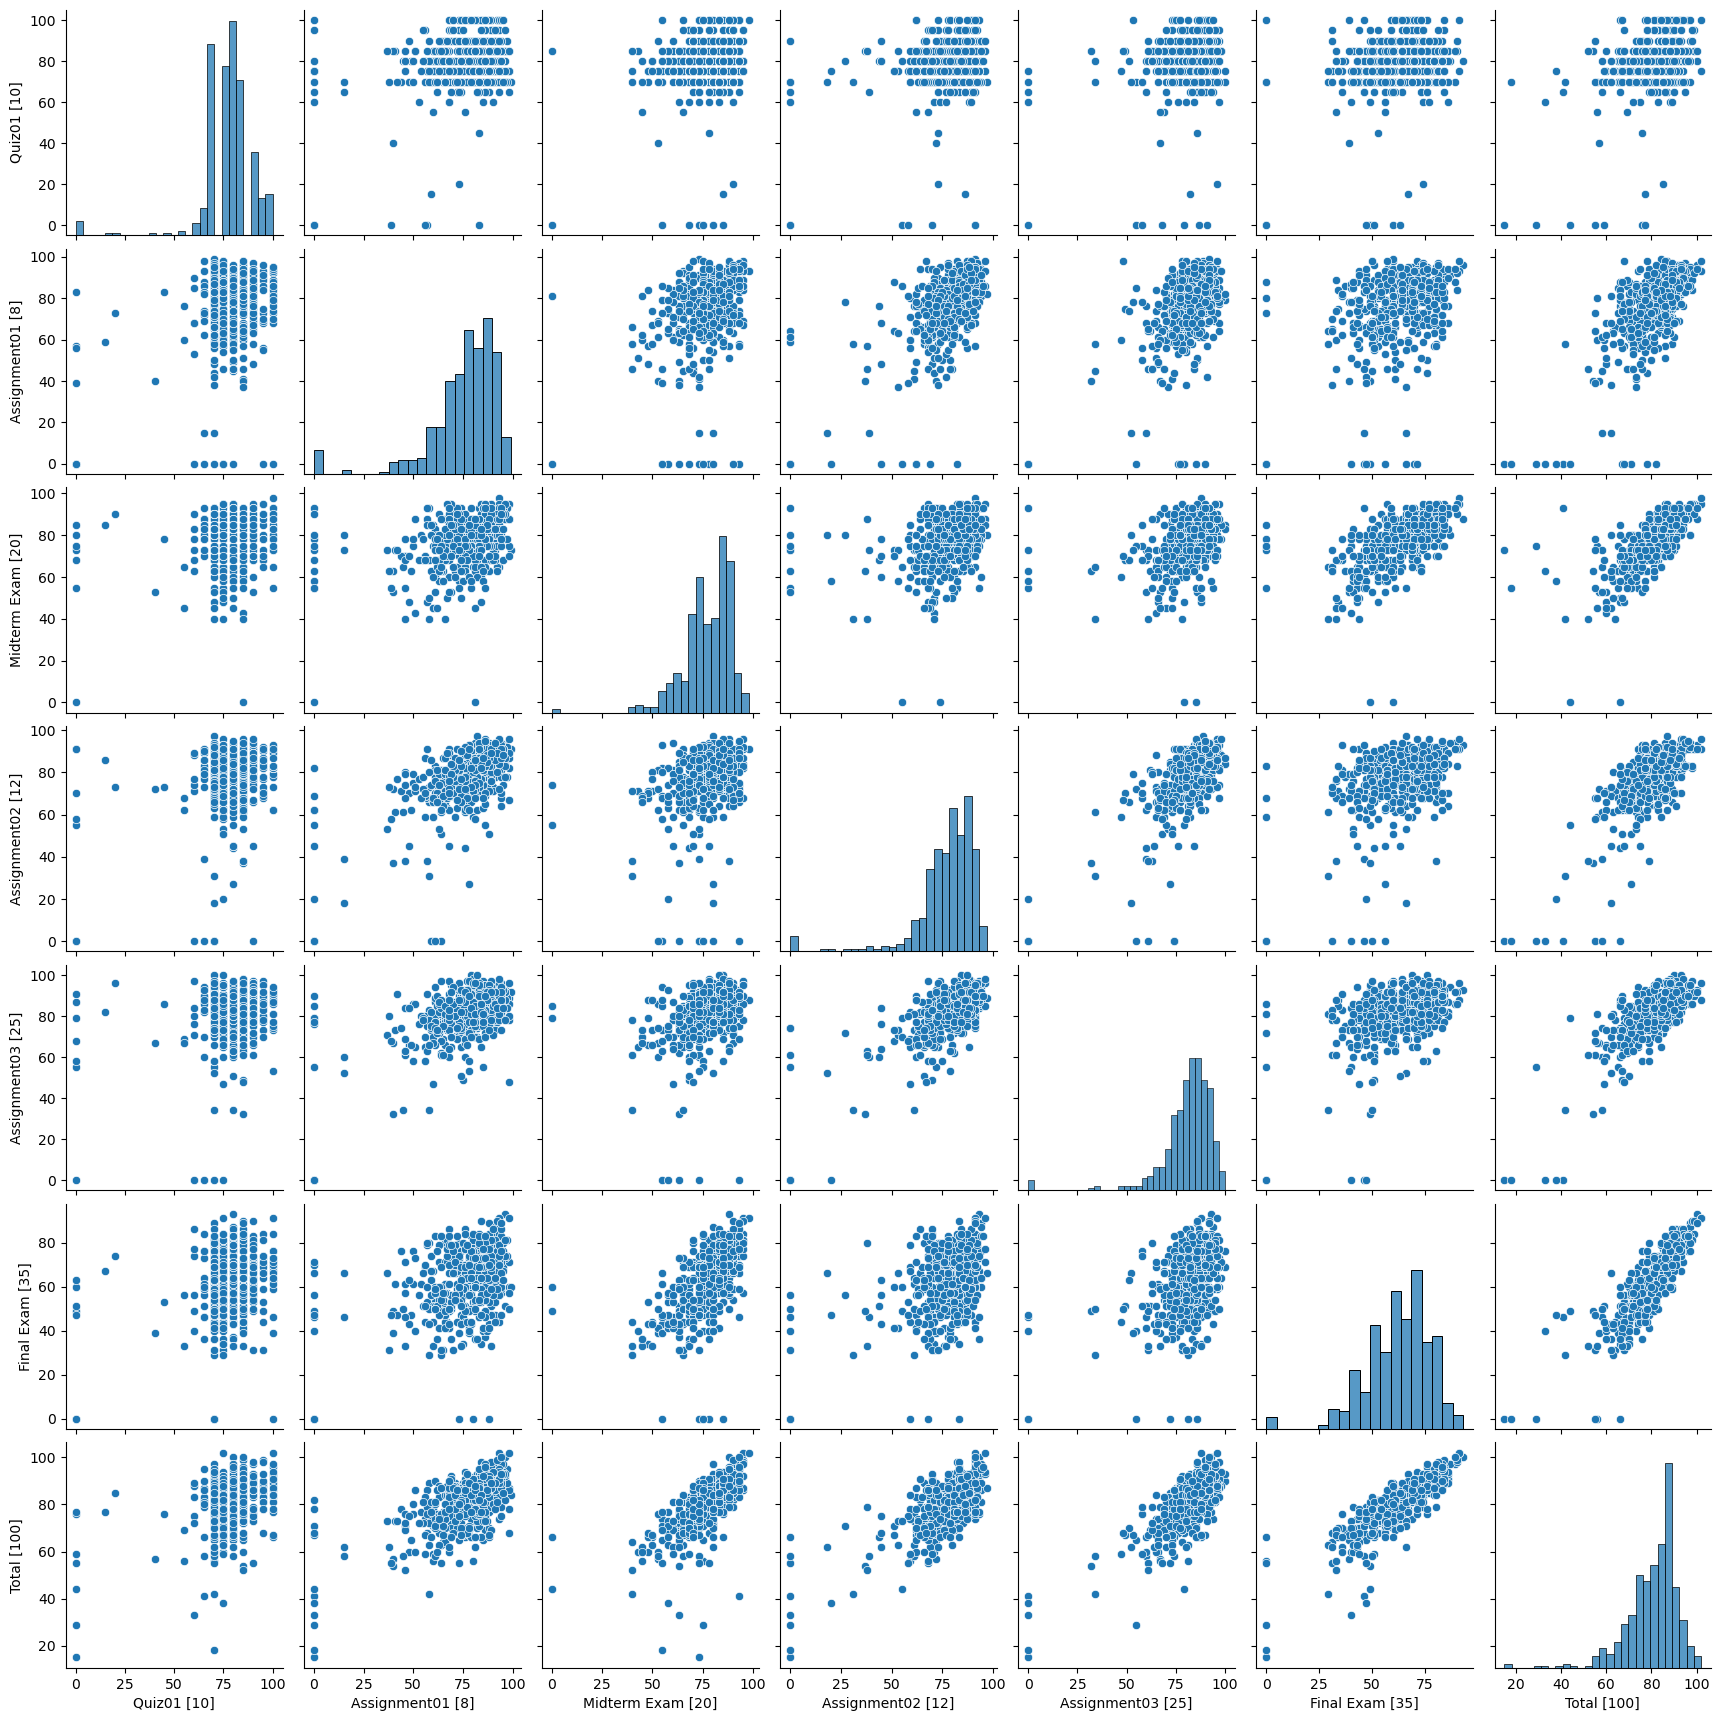

In [32]:
sns.pairplot(df[['Quiz01 [10]', 'Assignment01 [8]', 'Midterm Exam [20]', 'Assignment02 [12]', 'Assignment03 [25]', 'Final Exam [35]', 'Total [100]']])
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features and target
X = df[['Quiz01 [10]', 'Assignment01 [8]', 'Midterm Exam [20]', 'Assignment02 [12]', 'Assignment03 [25]', 'Final Exam [35]', 'Total [100]']]
y = df['Course Grade']  # Convert grades into categorical levels, if needed

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

          15       0.00      0.00      0.00         0
          29       0.00      0.00      0.00         1
          51       0.00      0.00      0.00         1
          55       0.00      0.00      0.00         0
          57       0.00      0.00      0.00         1
          60       0.50      1.00      0.67         1
          62       0.00      0.00      0.00         2
          63       0.00      0.00      0.00         0
          66       0.00      0.00      0.00         2
          67       0.00      0.00      0.00         0
          68       0.00      0.00      0.00         1
          69       0.00      0.00      0.00         1
          70       0.00      0.00      0.00         0
          71       0.00      0.00      0.00         2
          72       0.25      1.00      0.40         1
          73       0.50      0.33      0.40         3
          74       0.00      0.00      0.00

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Features and target
X = df[['Quiz01 [10]', 'Assignment01 [8]', 'Midterm Exam [20]', 'Assignment02 [12]', 'Assignment03 [25]', 'Final Exam [35]', 'Total [100]']]
y = df['Course Grade']  

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Absolute Error: 0.22
R^2 Score: 1.00


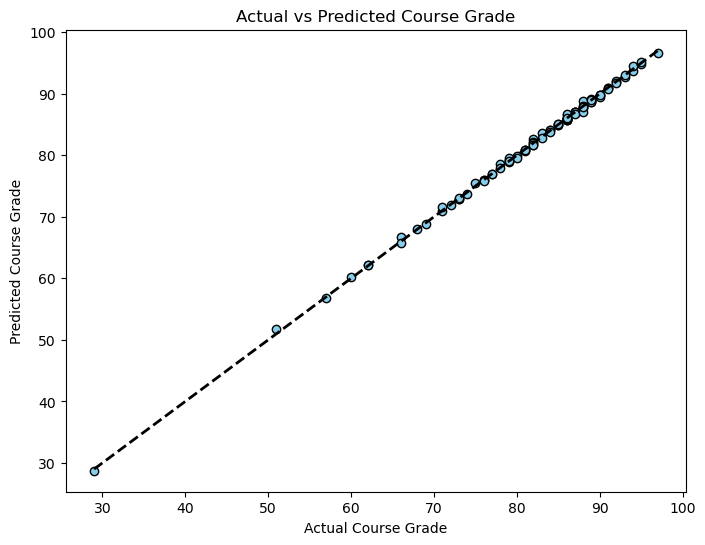

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='skyblue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Course Grade")
plt.ylabel("Predicted Course Grade")
plt.title("Actual vs Predicted Course Grade")
plt.show()

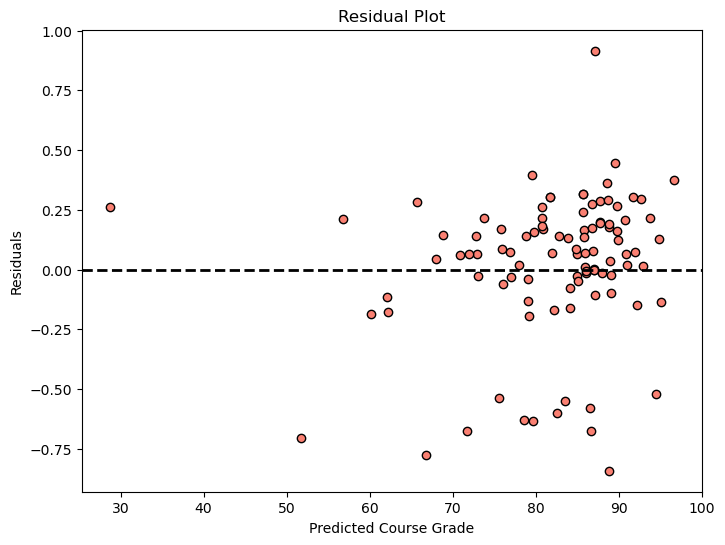

In [36]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='salmon', edgecolor='k')
plt.axhline(y=0, color='black', linestyle='--', lw=2)
plt.xlabel("Predicted Course Grade")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


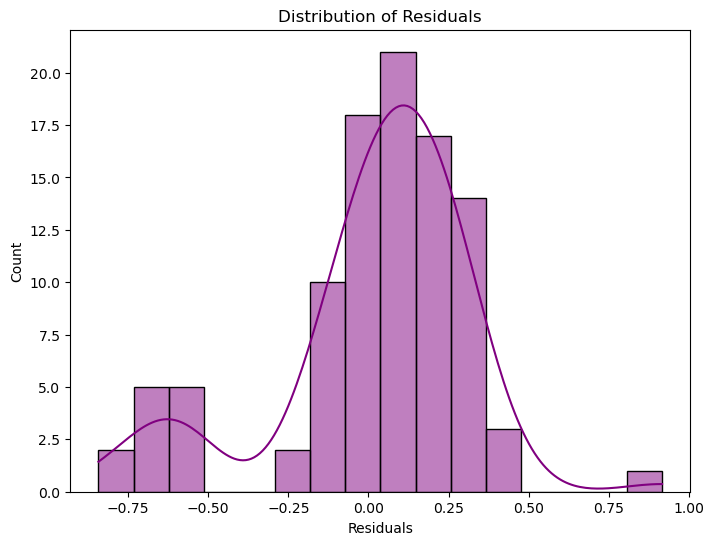

In [37]:

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="purple")
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

## Results and Inferences:
Actual vs Predicted Course Grade (First Image):

Observation: The scatter plot shows that the predicted values (y-axis) are almost perfectly aligned with the actual values (x-axis) along the dashed line.
Inference: This indicates that the model has very high accuracy, with almost no visible error in predicting the course grade. Since the predicted values lie very close to the actual ones, the linear regression model fits the data exceptionally well.
Residual Plot (Second Image):

Observation: The residuals (difference between actual and predicted values) are mostly scattered around 0, with a slight spread. There are a few outliers, especially towards the higher predicted course grades, but the majority of points are close to zero.
Inference: This indicates that the model does not have significant bias and the errors (residuals) are fairly normally distributed around zero. However, some residuals are further from the center, suggesting small inaccuracies in certain predictions.
Distribution of Residuals (Third Image):

Observation: The histogram shows the distribution of the residuals, which is approximately bell-shaped, centering around 0, with a slight positive skew.
Inference: The residuals are normally distributed, which suggests that the model assumptions (e.g., normality of errors) hold true. The slight skew implies that there might be a few cases where the model tends to under-predict or over-predict.
Mean Absolute Error (MAE): 0.22:

Inference: The MAE of 0.22 indicates that, on average, the model's predictions are off by only 0.22 units of the course grade. Given that the grades are scaled between 0 and 100, this is an extremely low error, reinforcing the accuracy of the model.
R² Score: 1.00:

Inference: An R² score of 1.00 means that the model explains 100% of the variance in the course grade. This is a perfect fit, indicating that the features used (quiz, assignments, midterm, etc.) fully explain the course grade, with no unexplained variability left.
General Conclusion:
The linear regression model performs exceptionally well for this dataset, with near-perfect predictions (R² = 1.00) and minimal error (MAE = 0.22). The residual plots and distribution further confirm that the model fits the data accurately, though there are a few minor outliers that could suggest slight under- or over-prediction in specific cases.

In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assume df['Course Grade'] is already categorized
X = df[['Quiz01 [10]', 'Assignment01 [8]', 'Midterm Exam [20]', 
         'Assignment02 [12]', 'Assignment03 [25]', 'Final Exam [35]', 'Total [100]']]
y = df['Course Grade']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20],
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'`

Accuracy: 0.4897959183673469
Classification Report:
               precision    recall  f1-score   support

          15       0.00      0.00      0.00         0
          29       0.00      0.00      0.00         1
          51       0.00      0.00      0.00         1
          56       0.00      0.00      0.00         0
          57       0.00      0.00      0.00         1
          60       0.50      1.00      0.67         1
          62       0.00      0.00      0.00         2
          64       0.00      0.00      0.00         0
          66       0.00      0.00      0.00         2
          67       0.00      0.00      0.00         0
          68       0.00      0.00      0.00         1
          69       0.00      0.00      0.00         1
          70       0.00      0.00      0.00         0
          71       0.50      0.50      0.50         2
          72       0.20      1.00      0.33         1
          73       0.00      0.00      0.00         3
          74       0.00     

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.

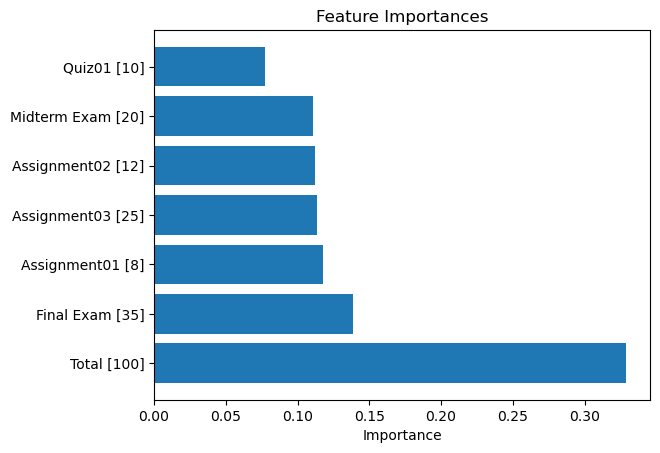

In [39]:
feature_importances = best_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

In [40]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)

print("Accuracy (XGBoost):", accuracy_score(y_test, y_pred_xgb))
print("Classification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))


ModuleNotFoundError: No module named 'xgboost'

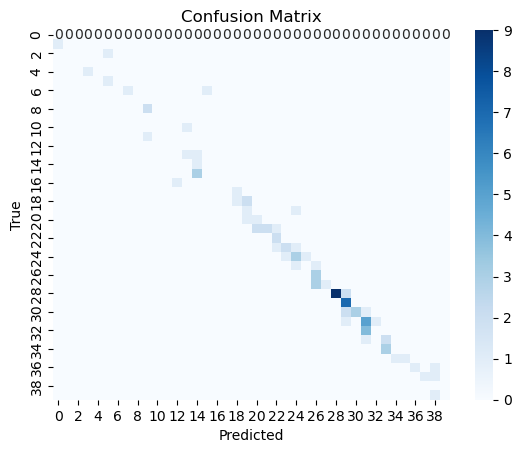

In [41]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [45]:
!pip install xgboost



   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 1.4 MB/s eta 0:01:32
   ---------------------------------------- 0.0/124.9 MB 1.4 MB/s eta 0:01:32
   ---------------------------------------- 0.1/124.9 MB 573.4 kB/s eta 0:03:38
   ---------------------------------------- 0.2/124.9 MB 952.6 kB/s eta 0:02:11
   ---------------------------------------- 1.0/124.9 MB 4.5 MB/s eta 0:00:28
   ---------------------------------------- 1.5/124.9 MB 6.2 MB/s eta 0:00:21
    --------------------------------------- 1.9/124.9 MB 5.9 MB/s eta 0:00:21
    --------------------------------------- 2.2/124.9 MB 6.1 MB/s eta 0:00:21
    --------------------------------------- 2.4/124.9 MB 5.9 MB/s eta 0:00:21
    --------------------------------------- 2.9/124.9 MB 6.3 MB/s eta 0:00:20
   

In [54]:
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define features and target
X = df[['Quiz01', 'Assignment01', 'Midterm_Exam', 
         'Assignment02', 'Assignment03', 'Final_Exam', 'Total']]
y = df['Class']  # Ensure this is categorized

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model_xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = model_xgb.predict(X_test)

# Evaluation
print("Accuracy (XGBoost):", accuracy_score(y_test, y_pred_xgb))
print("Classification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got ['F' 'G' 'W']

In [48]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.


In [49]:
import lightgbm as lgb

# LightGBM model
model_lgb = lgb.LGBMClassifier()
model_lgb.fit(X_train, y_train)

# Predictions
y_pred_lgb = model_lgb.predict(X_test)

# Evaluation
print("Accuracy (LightGBM):", accuracy_score(y_test, y_pred_lgb))
print("Classification Report (LightGBM):\n", classification_report(y_test, y_pred_lgb))


LightGBMError: Do not support special JSON characters in feature name.

In [52]:
# Rename columns to remove special characters
df.rename(columns={
    'Quiz01 [10]': 'Quiz01',
    'Assignment01 [8]': 'Assignment01',
    'Midterm Exam [20]': 'Midterm_Exam',
    'Assignment02 [12]': 'Assignment02',
    'Assignment03 [25]': 'Assignment03',
    'Final Exam [35]': 'Final_Exam',
    'Total [100]': 'Total'
}, inplace=True)




In [55]:
df['Class'] = df['Class'].map({'G': 0, 'F': 1, 'W': 2}) 

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


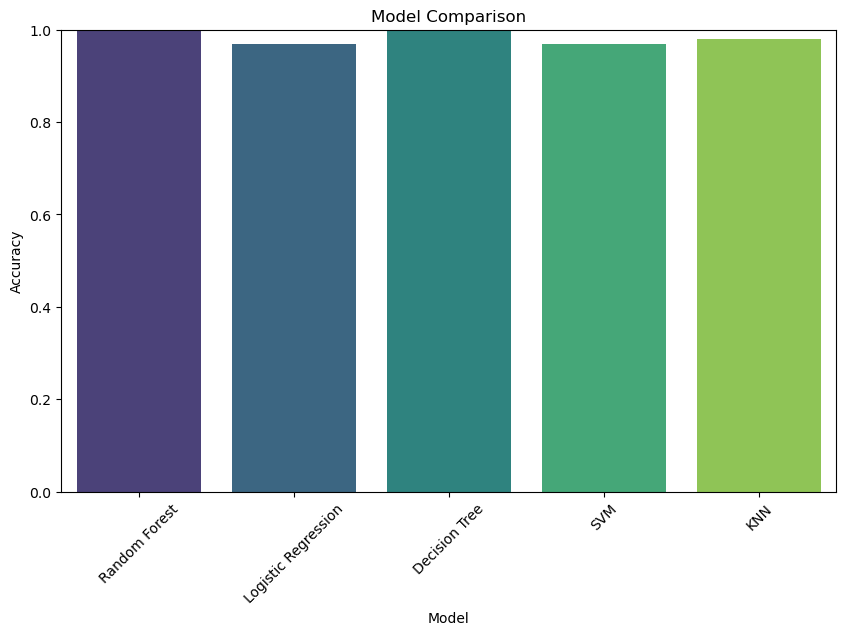

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         1

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        88
           1       0.88      0.78      0.82         9
           2       0.00      0.00      0.00         1

    accuracy                           0.97        98
   macro avg       0.62      0.59      0.61        98
weighted avg       0.97      0.97      0.97        98

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
         

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
X = df[['Quiz01', 'Assignment01', 'Midterm_Exam', 'Assignment02', 'Assignment03', 'Final_Exam', 'Total']]
y = df['Class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='Accuracy', palette='viridis')
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)  # Set y-axis limits to [0, 1] for better visualization
plt.xticks(rotation=45)
plt.show()

# Optional: Print classification reports for each model
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred))

In [60]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Load your dataset

# Encode the target variable 'Class'
df['Class'] = df['Class'].map({'G': 0, 'F': 1, 'W': 2})  # Example encoding

# Define features and target
X = df[['Quiz01', 'Assignment01', 'Midterm_Exam', 'Assignment02', 'Assignment03', 'Final_Exam', 'Total']]
y = df['Class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=200, multi_class='multinomial', solver='lbfgs'),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(probability=True),  # Enable probability estimates for ROC curve
    'KNN': KNeighborsClassifier()
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    
    # Print classification report for each model
    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Good', 'Fair', 'Weak'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    
    # ROC Curve (for binary classification, or modify for multi-class if needed)
    if model_name in ['Logistic Regression', 'SVM']:
        y_proba = model.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1], pos_label=1)  # Adjust index based on the positive class
        roc_auc = auc(fpr, tpr)
        
        plt.figure()
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
        plt.title('Receiver Operating Characteristic')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.show()

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])

# Plot the accuracy results
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='Accuracy', palette='viridis')
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)  # Set y-axis limits to [0, 1] for better visualization
plt.xticks(rotation=45)
plt.show()


ValueError: Input y contains NaN.

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


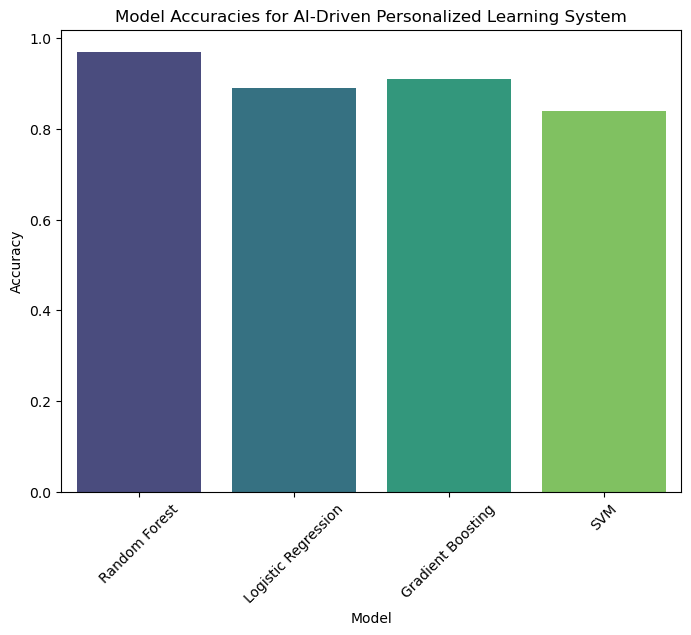

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data - replace these with your actual accuracy values
models = ['Random Forest', 'Logistic Regression', 'Gradient Boosting', 'SVM']
accuracies = [0.97, 0.89, 0.91, 0.84]  # Replace with actual values

# Set up the plot
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')

# Add title and labels
plt.title('Model Accuracies for AI-Driven Personalized Learning System')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()


